<a href="https://colab.research.google.com/github/bardagan/logo_classifier/blob/master/create_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create and save data set

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

## **Creating Data Set**

install chromium, its driver, and selenium:

In [3]:
!apt update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
!pip install google_images_download

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [819 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages

Set option to be headless

In [0]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('–headless')
options.add_argument('–no-sandbox')
options.add_argument('–disable-dev-shm-usage')

### Connect to Google **Drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Get Images

In [0]:
MAX_NUMBER_OF_IMAGES = 100
path = "/content/drive/My Drive/data/"
path += "logos/"
brands = ['starkey', 'mishcon']

In [0]:
for brand in brands:
  keyword = brand + " logo"
  folder_path = path + brand
  !googleimagesdownload -o "{folder_path}" --chromedriver '/usr/bin/chromedriver' -n -l {MAX_NUMBER_OF_IMAGES} -k "{keyword}"

In [0]:
!googleimagesdownload -o "/content/drive/My Drive/data/logos/starkey" --chromedriver '/usr/bin/chromedriver' -n -l {MAX_NUMBER_OF_IMAGES} -si "https://upload.wikimedia.org/wikipedia/en/3/30/Starkey_Hearing_Technologies_Logo.jpg"

In [0]:
!googleimagesdownload -o "/content/drive/My Drive/data/logos/mishcon" --chromedriver '/usr/bin/chromedriver' -n -l {MAX_NUMBER_OF_IMAGES} -si "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTtBMqbkJn-7Ry7o2g3f9CkJQQHWRkNMNYxGktuj5sOu28VA9PQ7g"

In [0]:
path = pathlib.Path('/content/drive/My Drive/data/logos')


In [0]:
classes = ['adidas','nike']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## Looking at the data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, bs=16,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

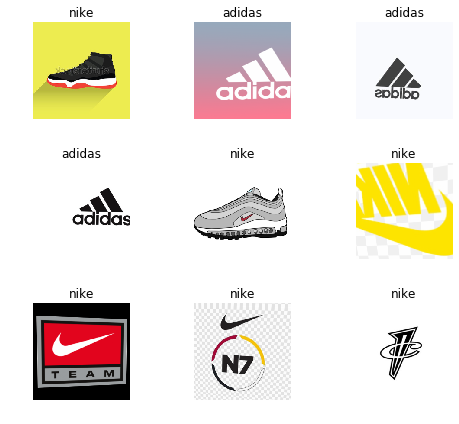

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['adidas', 'nike']


(2, 2)